In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)


def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)


#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=32)
history = model.fit(train_generator, epochs=50, validation_data=(input_X_test, output_Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.90      0.96      0.93      1000
           2       0.86      0.71      0.78      1000
           3       0.74      0.69      0.72      1000
           4       0.83      0.80      0.82      1000
           5       0.89      0.68      0.77      1000
           6       0.63      0.97      0.76      1000
           7       0.94      0.83      0.88      1000
           8       0.96      0.88      0.92      1000
           9       0.83      0.96      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000

 Image 100 is [4]
1/1 [==============================] - 1s 612ms/step
The model predict that image 100 is 4


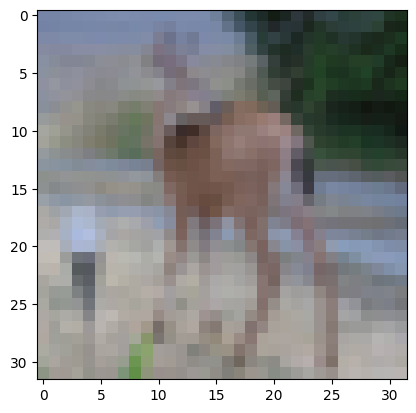

In [ ]:
print(classification_report(output_y_test, y_pred))
my_image = input_X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {output_y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

In [ ]:
from tensorflow.keras.models import load_model

# After training your model and you're satisfied with the results
model.save('working3250.h5')  # Creates a HDF5 file 'my_model.h5'



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 8ms/step - loss: 0.5265 - accuracy: 0.8324
Test Accuracy : 83.24%
313/313 [==============================] - 3s 6ms/step


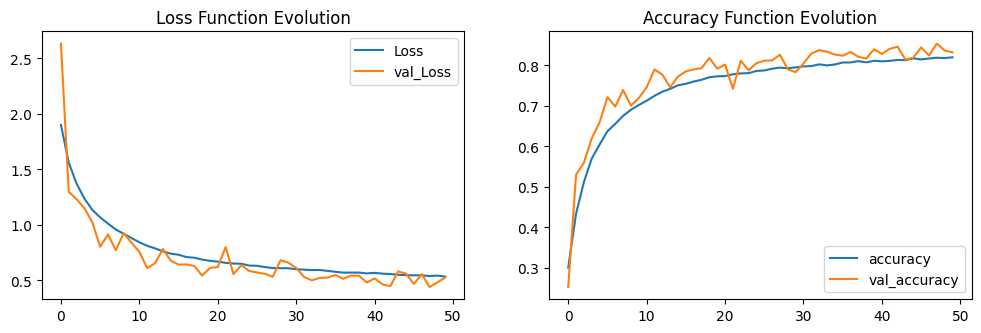

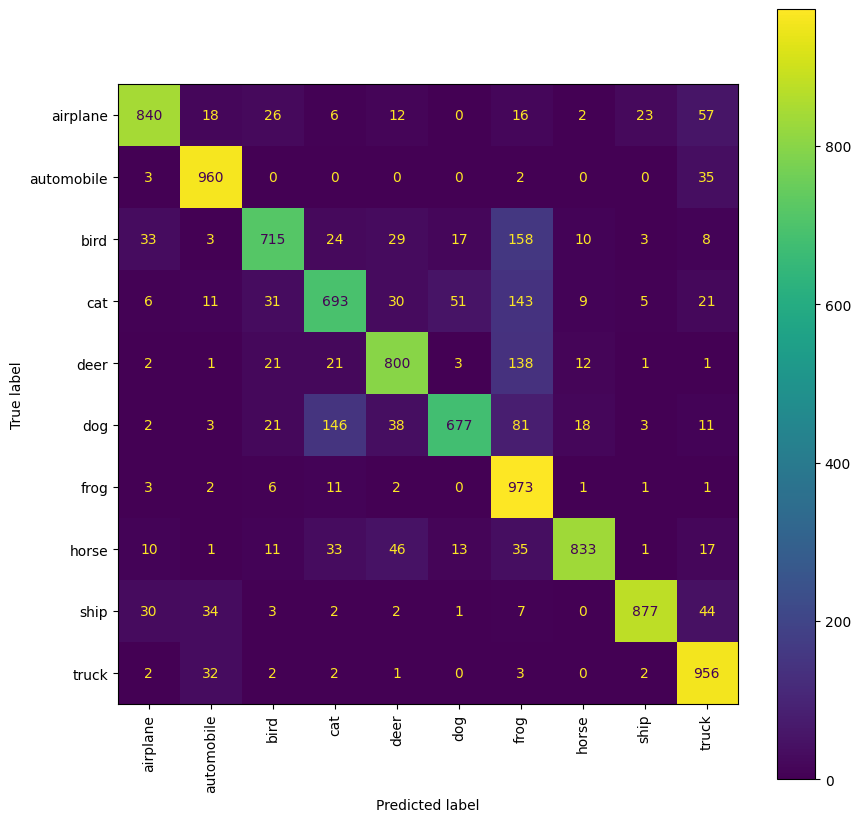

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax)

plt.show()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)


def build_custom_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

# Build and compile the model
model = build_custom_cnn()
optimizer = Adam(learning_rate=0.001, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

batch_size = 64
#data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow(input_X_train, output_Y_train, batch_size=64)
history = model.fit(train_generator, epochs=100, validation_data=(input_X_test, output_Y_test),shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

In [ ]:
from tensorflow.keras.models import load_model

# After training your model and you're satisfied with the results
model.save('working64100.h5')  # Creates a HDF5 file 'my_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.4067 - accuracy: 0.8700
Test Accuracy : 87.00%
313/313 [==============================] - 1s 3ms/step


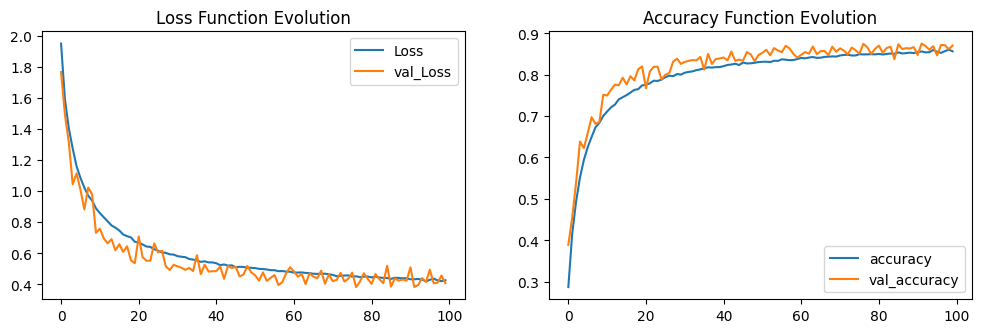

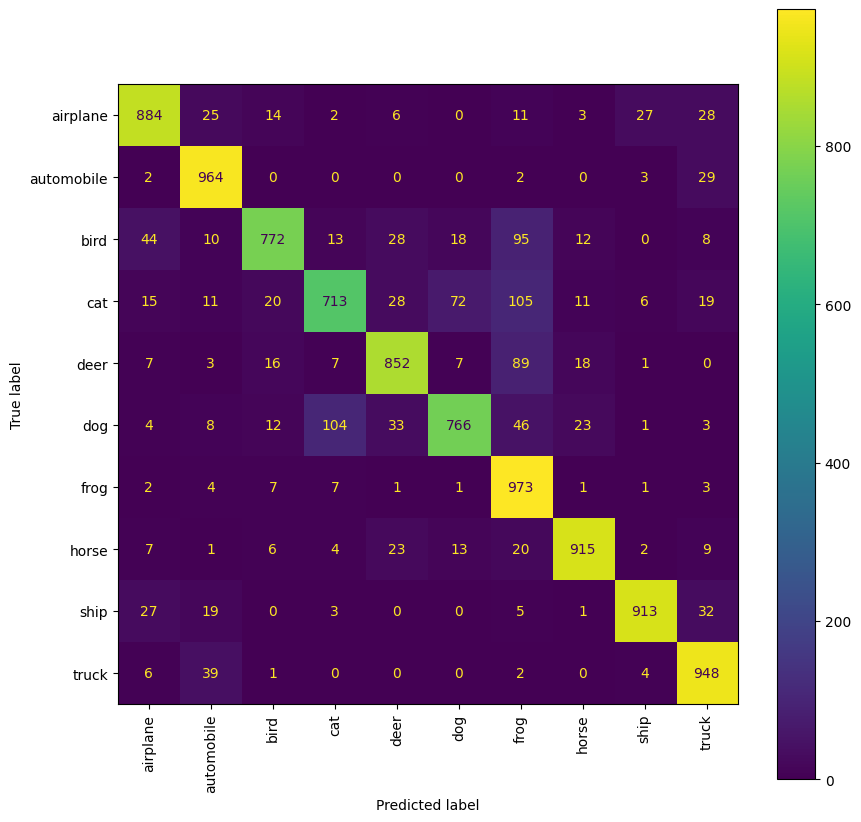

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()

evaluation = model.evaluate(input_X_test, output_Y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(input_X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(output_y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax)

plt.show()

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1000
           1       0.89      0.96      0.93      1000
           2       0.91      0.77      0.84      1000
           3       0.84      0.71      0.77      1000
           4       0.88      0.85      0.86      1000
           5       0.87      0.77      0.82      1000
           6       0.72      0.97      0.83      1000
           7       0.93      0.92      0.92      1000
           8       0.95      0.91      0.93      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

 Image 100 is [4]
1/1 [==============================] - 0s 105ms/step
The model predict that image 100 is 4


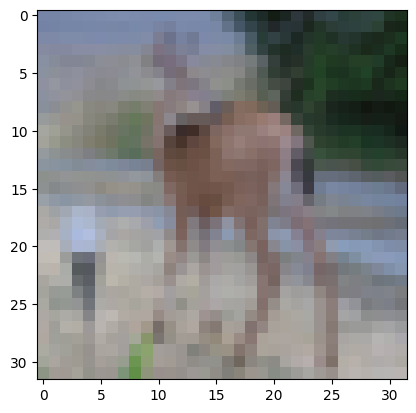

In [ ]:
print(classification_report(output_y_test, y_pred))
my_image = input_X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {output_y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

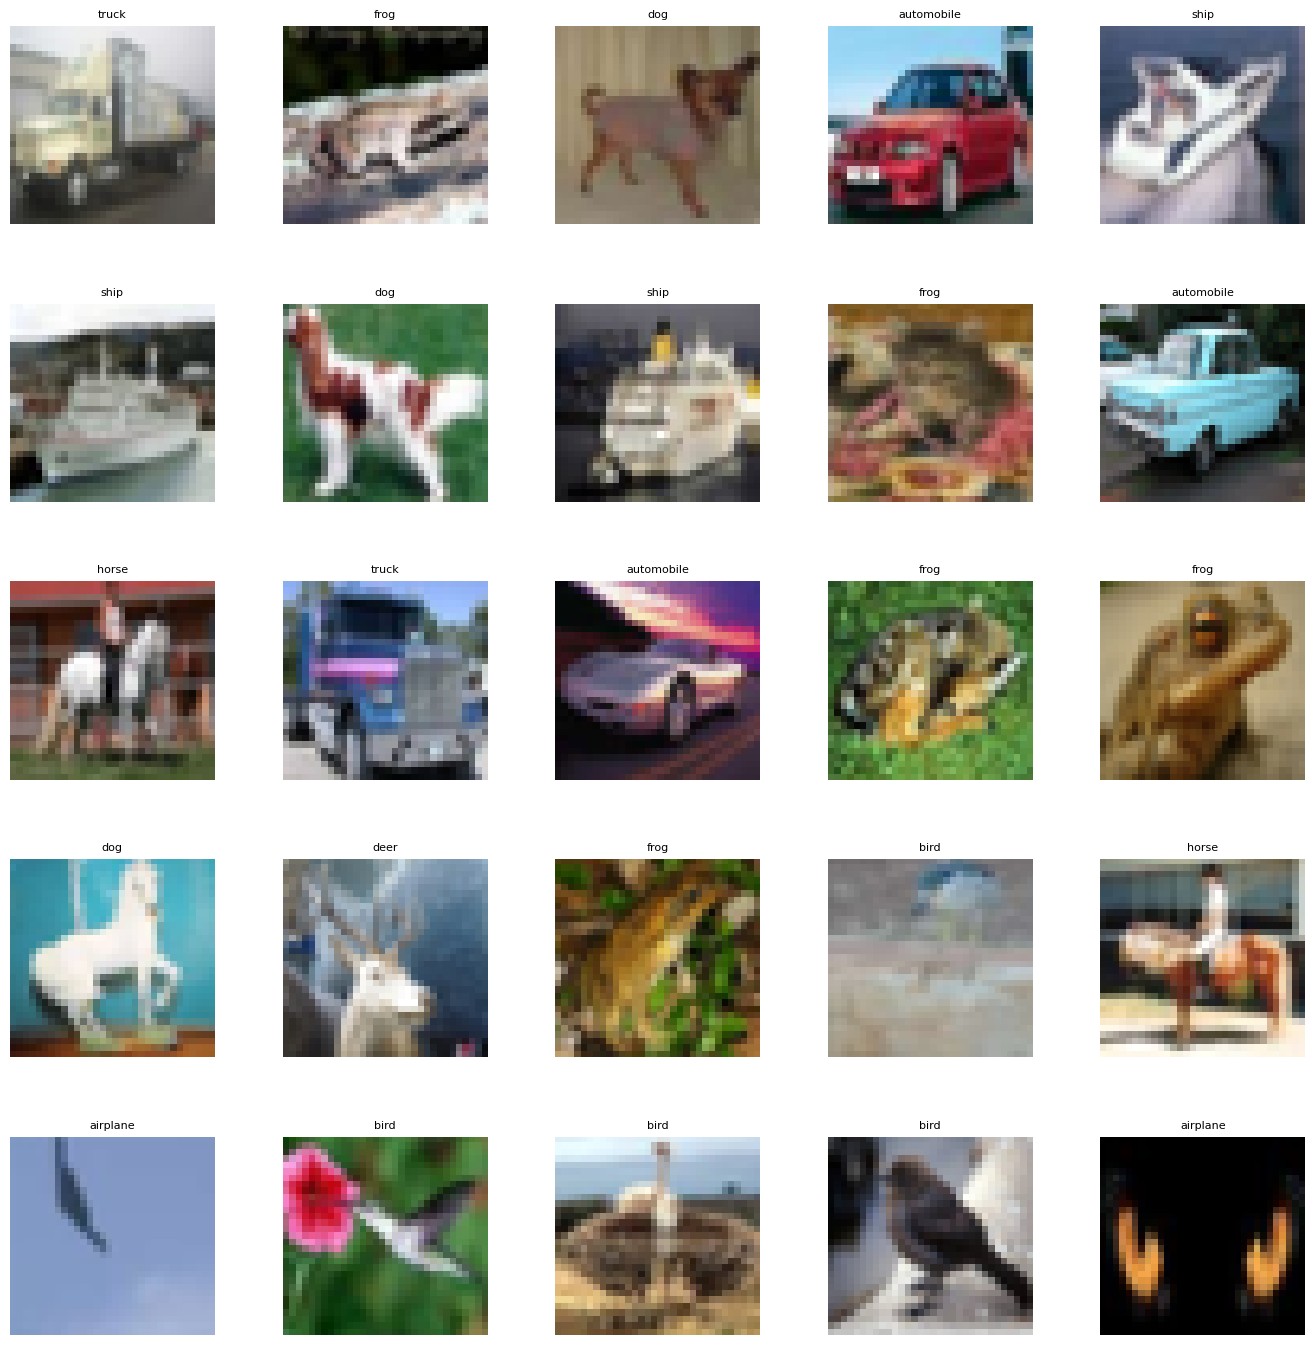

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(input_X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(input_X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 2s 7ms/step


<ipython-input-14-83eb910e855a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",


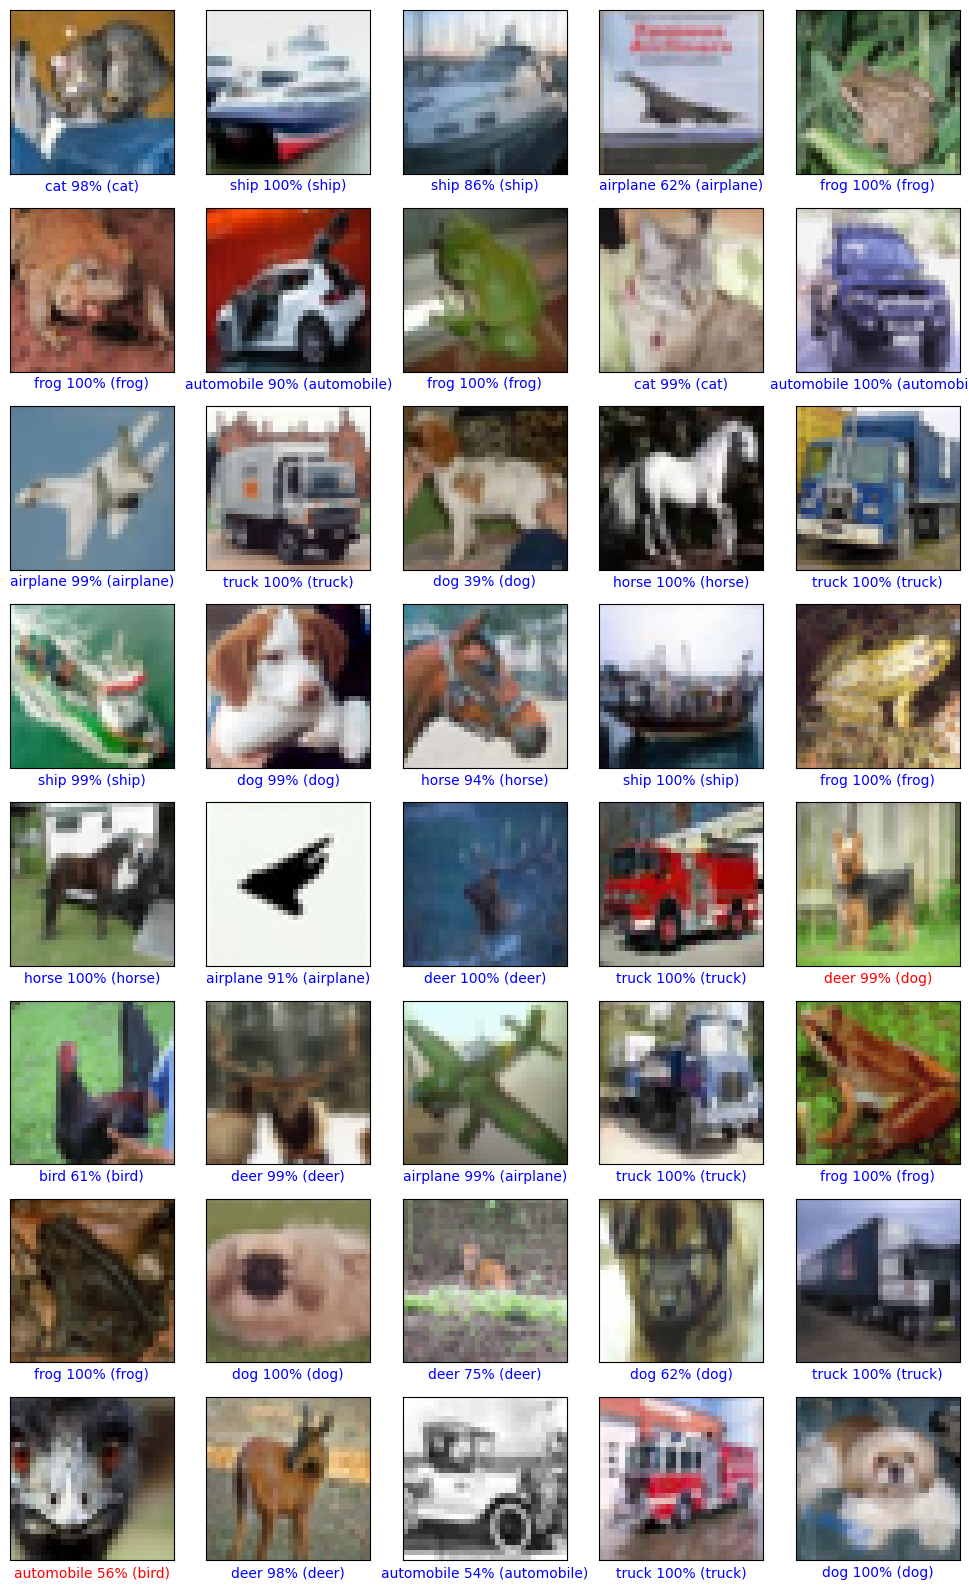

In [ ]:
predictions = model.predict(input_X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=( 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols,  i + 1)
    plot_image(i, predictions[i], output_y_test, input_X_test)

plt.tight_layout()
plt.show()

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
IMG_ROWS, IMG_COLS, IMG_CHANNELS = 32, 32, 3  # Example dimensions
N_CLASSES = 10
model = Sequential()

# First Conv Block
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Second Conv Block
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# Third Conv Block (Added to increase complexity)
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Third Conv Block (Added to increase complexity)
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
# Fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001, weight_decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model architecture
model.summary()
# train by fitting the model on batches with real-time data augmentation
history = model.fit(data_gen.flow(input_X_train, output_Y_train, batch_size=64), epochs=100, verbose=2, shuffle=True)
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=64, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'Adam' is not defined

5.51397992922929
248
12


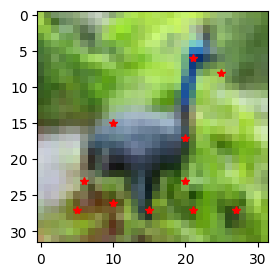

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2gray
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[6]
ratio = [0.05, 0.05, 0.05, 0.05, 0.01, 0.001]
count = 0
#Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

    #Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma =1)

    #Find gradient Fx
x_grad = gradient_x(blur_img)

    #Find gradient Fy
y_grad = gradient_y(blur_img)



#Phase II : Find corners
xx_grad = x_grad * x_grad
yy_grad = y_grad * y_grad
xy_grad = x_grad * y_grad
tuple_data = [] #Contains y, x Co-ordinates and its corner response
k = 0.05
max = 0

for i in range(1, int(input_img.shape[0] - 1)) :
        for j in range(1, int(input_img.shape[1] - 1)) :
            window_x = xx_grad[i-1 : i+2 , j-1 : j+2]
            window_y = yy_grad[i-1 : i+2 , j-1 : j+2]
            window_xy = xy_grad[i-1 : i+2 , j-1 : j+2]
            sum_xx = np.sum(window_x)
            sum_yy = np.sum(window_y)
            sum_xy = np.sum(window_xy)
            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy
            R = determinant - (k * trace * trace)
            tuple_data.append((i, j, R))
            if(R > max) :
                max = R
print(max)
    #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
L = []
thres_ratio = 0.02
count+=1
threshold = thres_ratio * max
for res in tuple_data :
    i, j, R = res
    if R > threshold :
        L.append([i, j, R])



#Phase III : Non maximal suppression
sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
final_L = [] #final_l contains list after non maximal suppression
final_L.append(sorted_L[0][:-1])
dis = 3
xc, yc = [], []
for i in sorted_L :
    for j in final_L :
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else :
        final_L.append(i[:-1])
        xc.append(i[1])
        yc.append(i[0])
print(len(sorted_L))
print(len(final_L))

    #Print Final Image
corner_img = np.zeros(input_img.shape)
    #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

for i in final_L :
    y, x = i[0], i[1]
    corner_img[y][x] = 1
fig, ax = plt.subplots(figsize=(5, 3))  # Adjust these values as needed

ax.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc, yc, '*', color='red')
plt.show()


43.25453194461761
539
7


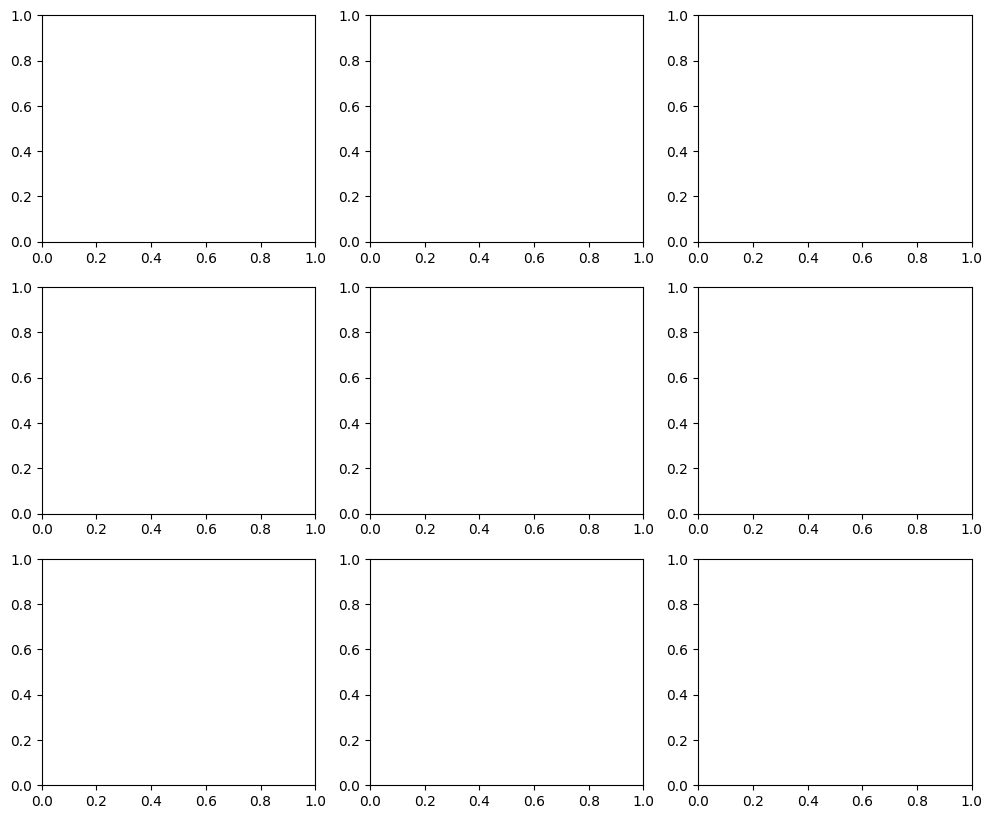

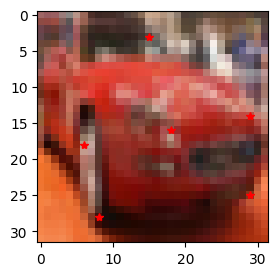

43.25453194461761
539
7


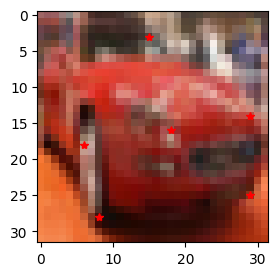

43.25453194461761
539
7


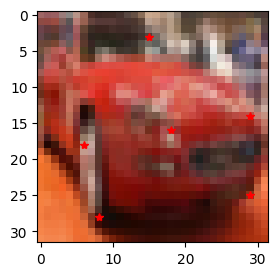

40.1780985071088
516
7


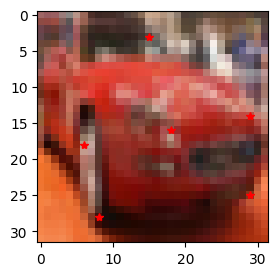

40.1780985071088
516
7


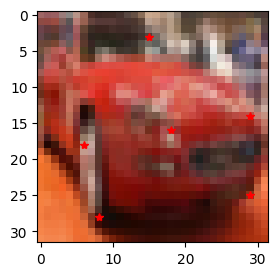

40.1780985071088
516
7


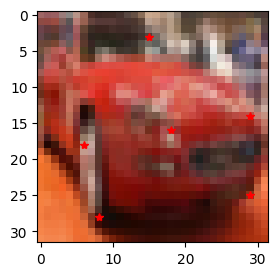

37.10166506959999
498
7


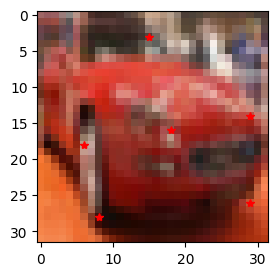

37.10166506959999
498
7


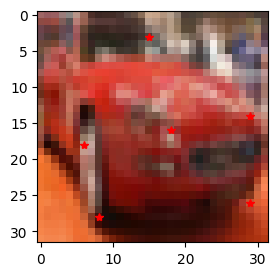

37.10166506959999
498
7


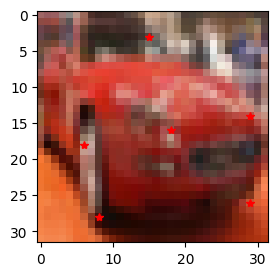

46.77399749217845
558
6


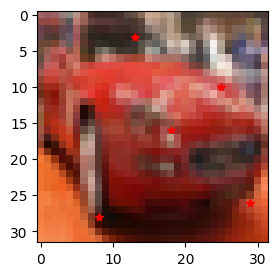

46.77399749217845
558
6


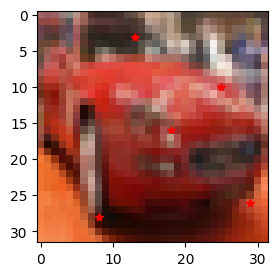

46.77399749217845
558
6


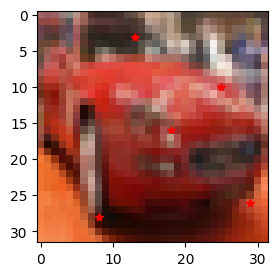

44.16323852761957
539
6


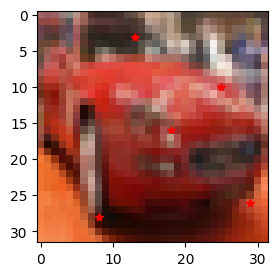

44.16323852761957
539
6


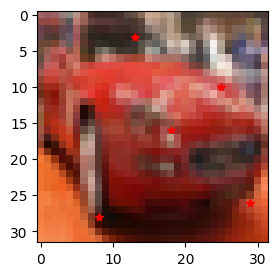

44.16323852761957
539
6


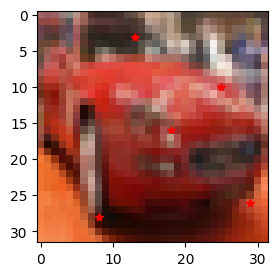

41.55247956306069
508
6


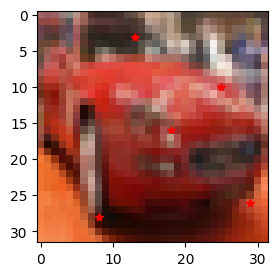

41.55247956306069
508
6


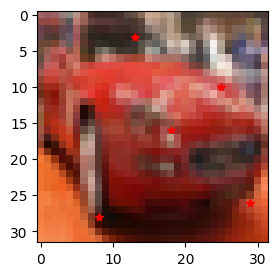

41.55247956306069
508
6


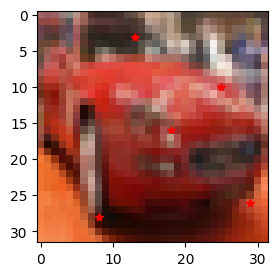

29.22047347913939
522
6


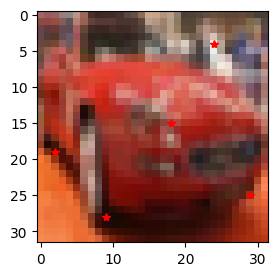

29.22047347913939
522
6


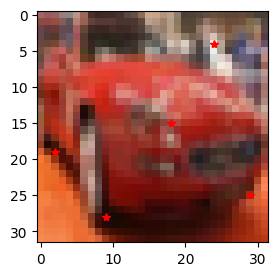

29.22047347913939
522
6


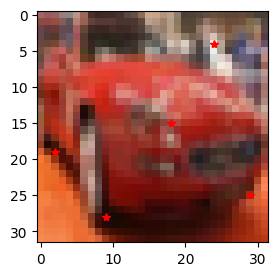

27.5901635179992
498
6


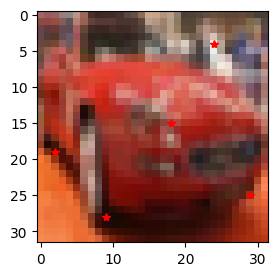

27.5901635179992
498
6


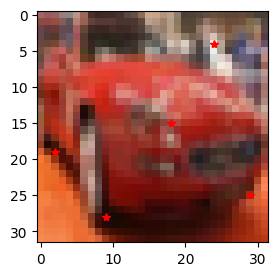

27.5901635179992
498
6


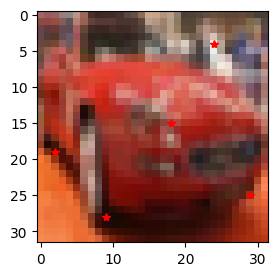

25.95985355685901
468
6


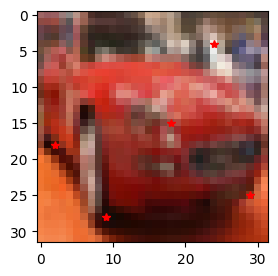

25.95985355685901
468
6


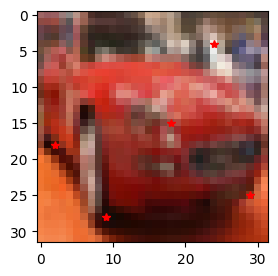

25.95985355685901
468
6


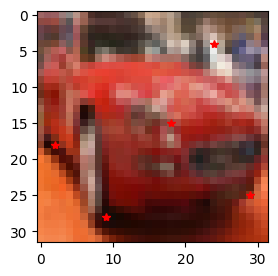

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()

def harris_corner_detection(image, sigma, k, threshold_ratio):
    # Convert the image to grayscale
    gray_input_img = rgb2gray(input_img)

        #Apply gaussian blurring
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma = sigma)

        #Find gradient Fx
    x_grad = gradient_x(blur_img)

        #Find gradient Fy
    y_grad = gradient_y(blur_img)



    #Phase II : Find corners
    xx_grad = x_grad * x_grad
    yy_grad = y_grad * y_grad
    xy_grad = x_grad * y_grad
    tuple_data = [] #Contains y, x Co-ordinates and its corner response

    max = 0

    for i in range(1, int(input_img.shape[0] - 1)) :
            for j in range(1, int(input_img.shape[1] - 1)) :
                window_x = xx_grad[i-2 : i+3 , j-2 : j+3]
                window_y = yy_grad[i-2 : i+3 , j-2 : j+3]
                window_xy = xy_grad[i-2 : i+3 , j-2 : j+3]
                sum_xx = np.sum(window_x)
                sum_yy = np.sum(window_y)
                sum_xy = np.sum(window_xy)
                determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
                trace = sum_xx + sum_yy
                R = determinant - (k * trace * trace)
                tuple_data.append((i, j, R))
                if(R > max) :
                    max = R
    print(max)
        #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
    L = []

    threshold = thres_ratio * max
    for res in tuple_data :
        i, j, R = res
        if R > threshold :
            L.append([i, j, R])



    #Phase III : Non maximal suppression
    sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
    final_L = [] #final_l contains list after non maximal suppression
    final_L.append(sorted_L[0][:-1])
    dis = 5
    xc, yc = [], []
    for i in sorted_L :
        for j in final_L :
            if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
                break
        else :
            final_L.append(i[:-1])
            xc.append(i[1])
            yc.append(i[0])
    print(len(sorted_L))
    print(len(final_L))

        #Print Final Image
    corner_img = np.zeros(input_img.shape)
        #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

    for i in final_L :
        y, x = i[0], i[1]
        corner_img[y][x] = 1
    fig, ax = plt.subplots(figsize=(5, 3))  # Adjust these values as needed

    ax.imshow(input_img, cmap = plt.get_cmap('gray'))
    plt.plot(xc, yc, '*', color='red')
    plt.show()
    return xc, yc

# Parameters to tune
sigmas = [0.5, 1.0, 1.5]
ks = [0.04, 0.05, 0.06]
threshold_ratios = [0.01, 0.05, 0.1]

# Testing the function
fig, axes = plt.subplots(len(sigmas), len(ks), figsize=(12, 10))

for i, sigma in enumerate(sigmas):
    for j, k in enumerate(ks):
        for threshold_ratio in threshold_ratios:
            corners = harris_corner_detection(x_train[5], sigma=sigma, k=k, threshold_ratio=threshold_ratio)
            # ax = axes[i, j]
            # ax.imshow(rgb2gray(x_train[5]), cmap='gray')
            # ax.scatter(corners[:, 1], corners[:, 0], color='red', s=10)
            # ax.set_title(f'Sigma={sigma}, k={k}, Thresh={threshold_ratio}')
            # ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Implementation of Harris Corner Detector

#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)


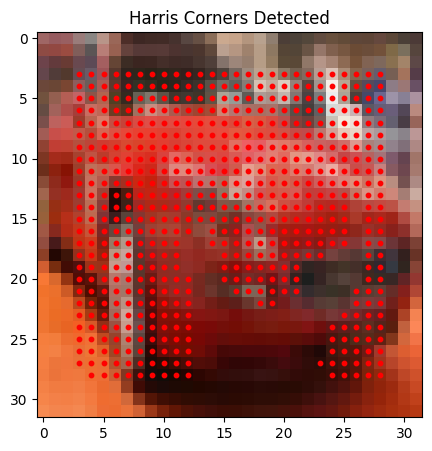

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[5]

# Convert to grayscale
gray_input_img = rgb2gray(input_img)

# Apply Gaussian blurring
sigma = 1.0
blur_img = ndimage.gaussian_filter(gray_input_img, sigma=sigma)

# Compute gradients
x_grad = np.gradient(blur_img, axis=1)  # axis=1 for x-direction
y_grad = np.gradient(blur_img, axis=0)  # axis=0 for y-direction
xx_grad = x_grad**2
yy_grad = y_grad**2
xy_grad = x_grad * y_grad

# Harris response calculation
k = 0.04
window_size = 3  # smaller window size
R = np.zeros_like(blur_img)
for i in range(window_size, blur_img.shape[0] - window_size):
    for j in range(window_size, blur_img.shape[1] - window_size):
        Sxx = np.sum(xx_grad[i-window_size:i+window_size+1, j-window_size:j+window_size+1])
        Syy = np.sum(yy_grad[i-window_size:i+window_size+1, j-window_size:j+window_size+1])
        Sxy = np.sum(xy_grad[i-window_size:i+window_size+1, j-window_size:j+window_size+1])
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        R[i, j] = det - k * (trace**2)

# Thresholding
threshold = 0.01 * np.max(R)
corners = np.argwhere(R > threshold)

# Plotting
plt.figure(figsize=(5, 5))
plt.imshow(input_img, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], color='red', s=10)  # note the x, y swap for scatter
plt.title("Harris Corners Detected")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# importing of modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = 'adam'
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [ ]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, _), (_, _) = cifar10.load_data()
input_img = x_train[6]  # Change index for different images

# Convert to grayscale
gray_input_img = rgb2gray(input_img)

# Apply Gaussian blurring
sigma = 1.0  # Adjust sigma to control the extent of smoothing
blurred_img = ndimage.gaussian_filter(gray_input_img, sigma=sigma)

# Apply Laplacian of Gaussian
log_img = ndimage.laplace(blurred_img)

# Zero-crossing approximation needs consistent array dimensions
diff_x = np.diff(np.sign(log_img), axis=0)
diff_y = np.diff(np.sign(log_img), axis=1)

# Making sure both differences have the same shape
zero_crossings = np.zeros_like(log_img)
zero_crossings[:-1, :-1] = (diff_x[:, :-1] != 0) & (diff_y[:-1, :] != 0)

# Apply a threshold to find significant zero crossings
threshold = np.abs(log_img).mean() * 1.5  # Threshold is 1.5 times the mean
corners = np.argwhere(zero_crossings & (np.abs(log_img) > threshold))

# Visualize the results
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(input_img, cmap='gray')
ax.scatter(corners[:, 1], corners[:, 0], color='red', s=10)
plt.title('LoG Corners Detected')
plt.show()


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from keras.datasets import cifar10
import numpy as np
import cv2

def load_cifar10_data():
    print('Loading CIFAR-10 data...')
    # Load the CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

    # Flatten the label arrays
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    return (train_images, train_labels), (test_images, test_labels)